# Sentiment analysis

Question: What is sentiment analysis?
Sentiment analysis, or opinion mining, is a Natural Language Processing (NLP) technique that involves determining and categorizing sentiments expressed in text. The primary goal is to identify whether the sentiment is positive, negative, or neutral. Some key aspects include:

Polarity Classification:
Positive, Negative, Neutral sentiments.
Subjectivity Detection:
Distinguishing between subjective (opinion-based) and objective (fact-based) text.
Intensity of Sentiment:
Categorizing sentiments into various levels of intensity.

Techniques:
Rule-based, Machine Learning, and Deep Learning approaches.

Challenges:
Context Understanding
Sarcasm and Irony Recognition
Domain Specificity
In the provided project, sentiment analysis is applied to women's clothing e-commerce reviews, aiming to categorize sentiments into five polarities: Strong Negative, Weak Negative, Neutral, Weak Positive, and Strong Positive. The task involves multi-class classification with ratings ranging from 1 to 5.

In [93]:
pip install transformers --upgrade

In [96]:
pip install xgboost catboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------- ----- 41.0/47.0 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 5.9 MB/s eta 0:00:17
   ---------------------------------------- 1.0/99.8 MB 15.4 MB/s eta 0:00:07
   ---------------------------------------- 1.0/99.8 MB 7.8 MB/s eta 0:00:13
    --------------------------------------- 2.1/99

In [106]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [70]:
#All the required libraries are imported here.
%config IPCompleter.greedy=True
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd
from transformers import RobertaTokenizer, RobertaModel, RobertaForSequenceClassification
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Download NLTK resources (you only need to run this once)
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('stopwords')
#from transformers import pipeline
print("Done!")

Done!


# Step 1

## Data loading and preprocessing.

In [71]:
#Here, I'll load the dataset using pandas, apply preprocessing and also clean the data if needed
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\archive\\Womens Clothing E-Commerce Reviews.csv")
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                

Data Exploration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None

Summary Statistics:
         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000

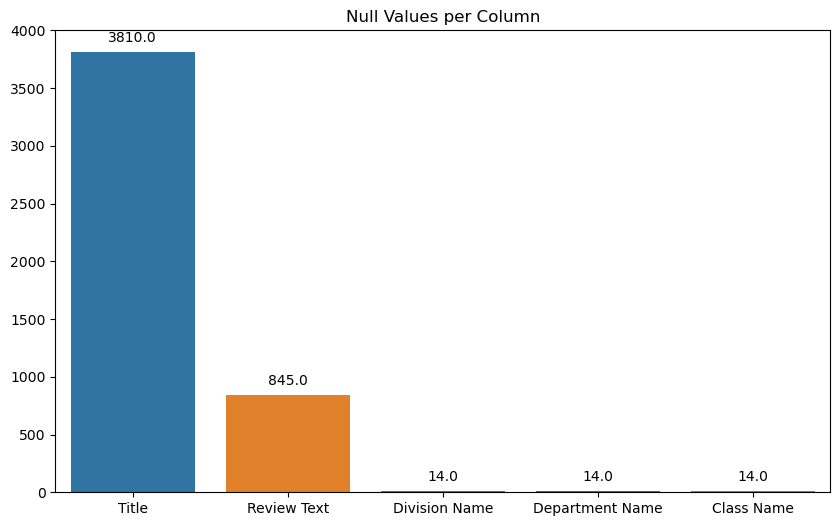

In [72]:
# Data Exploration
print("Data Exploration")
print(df.info());
print("\nSummary Statistics:")
print(df.describe());
print("\nMissing Values:")
print(df.isnull().sum());
print("\nDuplicate Rows:")
print(df.duplicated().sum());
print("\nUnique Values in 'Rating':")
print(df['Rating'].unique());

# Visualization of Null Values for Specific Columns
columns_to_visualize = ['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=columns_to_visualize, y=df[columns_to_visualize].isnull().sum().values)

# Display count of null values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Null Values per Column')
plt.show()

In [73]:
# Handle missing values for specific columns because dropping them would be loss of data that's imortant for analysis
columns_to_impute = ['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

df['Division Name'].fillna('other', inplace=True)
df['Department Name'].fillna('other', inplace=True)
df['Class Name'].fillna('other', inplace=True)
df['Title'].fillna('No title', inplace=True)
df['Review Text'].fillna('No review', inplace=True)

# Verify that missing values are handled
print("Missing Values After Imputation:")
print(df[columns_to_impute].isnull().sum())

Missing Values After Imputation:
Title              0
Review Text        0
Division Name      0
Department Name    0
Class Name         0
dtype: int64


In [74]:
#Here, we're making a column to see if there's a case where we have a sarcastic title and a genuine comment and vice-versa
# Concatenate 'Title' and 'Review Text' columns with a delimiter ":" into a new column 'Titled_Review'
df['Titled_Review'] = df['Title'] + ' : ' + df['Review Text']

# Verify the new column
#print(df['Titled_Review'].head())

#Also will create dummy variables the classes like department name, class name and division name
# Create dummy variables for 'Division Name,' 'Department Name,' and 'Class Name'
dummy_columns = ['Division Name', 'Department Name', 'Class Name']
df = pd.get_dummies(df, columns=dummy_columns, drop_first=True)

print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                 No title   
1           1         1080   34                 No title   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count                                      Titled_Review  \
0                        0  No title : Absolutely wonderful - silky and

In [75]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Stop words removal function
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.lower() not in stop_words]

# Lemmatization function
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

# Apply tokenization, stop words removal, and lemmatization to 'Titled_Review'
df['Tokenized_Review'] = df['Titled_Review'].apply(tokenize_text)
df['No_Stopwords_Review'] = df['Tokenized_Review'].apply(remove_stopwords)
df['Lemmatized_Review'] = df['No_Stopwords_Review'].apply(lemmatize_words)

# Verify the new columns
print(df[['Titled_Review', 'Tokenized_Review', 'No_Stopwords_Review', 'Lemmatized_Review']].head())

                                       Titled_Review  \
0  No title : Absolutely wonderful - silky and se...   
1  No title : Love this dress!  it's sooo pretty....   
2  Some major design flaws : I had such high hope...   
3  My favorite buy! : I love, love, love this jum...   
4  Flattering shirt : This shirt is very flatteri...   

                                    Tokenized_Review  \
0  [No, title, :, Absolutely, wonderful, -, silky...   
1  [No, title, :, Love, this, dress, !, it, 's, s...   
2  [Some, major, design, flaws, :, I, had, such, ...   
3  [My, favorite, buy, !, :, I, love, ,, love, ,,...   
4  [Flattering, shirt, :, This, shirt, is, very, ...   

                                 No_Stopwords_Review  \
0  [title, :, Absolutely, wonderful, -, silky, se...   
1  [title, :, Love, dress, !, 's, sooo, pretty, ....   
2  [major, design, flaws, :, high, hopes, dress, ...   
3  [favorite, buy, !, :, love, ,, love, ,, love, ...   
4  [Flattering, shirt, :, shirt, flattering, d

In [76]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the frequency of positive and negative words
def get_positive_negative_word_frequency(words):
    positive_words = []
    negative_words = []
    
    # Classify each word and count positive and negative occurrences
    for word in words:
        score = sia.polarity_scores(word)['compound']
        if score > 0:
            positive_words.append(word)
        elif score < 0:
            negative_words.append(word)
    
    positive_frequency = Counter(positive_words)
    negative_frequency = Counter(negative_words)
    
    return positive_frequency, negative_frequency

# Apply the function to 'Lemmatized_Review'
df[['Positive_Frequency', 'Negative_Frequency']] = df['Lemmatized_Review'].apply(lambda words: pd.Series(get_positive_negative_word_frequency(words)))

# Display the new columns
print(df[['Titled_Review', 'Positive_Frequency', 'Negative_Frequency']].head())

                                       Titled_Review  \
0  No title : Absolutely wonderful - silky and se...   
1  No title : Love this dress!  it's sooo pretty....   
2  Some major design flaws : I had such high hope...   
3  My favorite buy! : I love, love, love this jum...   
4  Flattering shirt : This shirt is very flatteri...   

                                  Positive_Frequency   Negative_Frequency  
0      {'wonderful': 1, 'sexy': 1, 'comfortable': 1}                   {}  
1  {'Love': 1, 'pretty': 1, 'glad': 1, 'love': 1,...                   {}  
2  {'hope': 1, 'ok.': 1, 'top': 1, 'comfortable':...  {'outrageously': 1}  
3  {'favorite': 1, 'love': 3, 'fun': 1, 'flirty':...                   {}  
4  {'Flattering': 1, 'flattering': 1, 'perfect': ...                   {}  


In [77]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to get the count of positive and negative words
def get_positive_negative_word_count(words):
    positive_count = 0
    negative_count = 0
    
    # Classify each word and count positive and negative occurrences
    for word in words:
        score = sia.polarity_scores(word)['compound']
        if score > 0:
            positive_count += 1
        elif score < 0:
            negative_count += 1
    
    return positive_count, negative_count

# Apply the function to 'Lemmatized_Review'
df[['Positive_Word_Count', 'Negative_Word_Count']] = df['Lemmatized_Review'].apply(lambda words: pd.Series(get_positive_negative_word_count(words)))

# Display the new columns
print(df[['Titled_Review', 'Positive_Word_Count', 'Negative_Word_Count']].head())

                                       Titled_Review  Positive_Word_Count  \
0  No title : Absolutely wonderful - silky and se...                    3   
1  No title : Love this dress!  it's sooo pretty....                    7   
2  Some major design flaws : I had such high hope...                    6   
3  My favorite buy! : I love, love, love this jum...                    9   
4  Flattering shirt : This shirt is very flatteri...                    5   

   Negative_Word_Count  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  


In [78]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each lemmatized review
df['compound'] = df['Lemmatized_Review'].apply(lambda words: sia.polarity_scores(' '.join(words))['compound'])

# Categorize the sentiment based on the compound score
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Display the sentiment scores and categories
print(df[['Titled_Review', 'compound', 'sentiment']].head())

                                       Titled_Review  compound sentiment
0  No title : Absolutely wonderful - silky and se...    0.8991  positive
1  No title : Love this dress!  it's sooo pretty....    0.9720  positive
2  Some major design flaws : I had such high hope...    0.9134  positive
3  My favorite buy! : I love, love, love this jum...    0.9634  positive
4  Flattering shirt : This shirt is very flatteri...    0.9380  positive


In [79]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Titled_Review',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Division Name_other', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend',
       'Department Name_other', 'Class Name_Casual bottoms',
       'Class Name_Chemises', 'Class Name_Dresses', 'Class Name_Fine gauge',
       'Class Name_Intimates', 'Class Name_Jackets', 'Class Name_Jeans',
       'Class Name_Knits', 'Class Name_Layering', 'Class Name_Legwear',
       'Class Name_Lounge', 'Class Name_Outerwear', 'Class Name_Pants',
       'Class Name_Shorts', 'Class Name_Skirts', 'Class Name_Sleep',
       'Class Name_Sweaters', 'Class Name_Swim', 'Class Name_Trend',
       'Class Name_other', 'Tokenized_Review', 'No_Stopwords_Review',
       'Lemmatized_Review', 'Positive_Frequency',

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7876\583060848.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Positive Feedback Count    1.000000
Positive_Word_Count        0.085710
Negative_Word_Count        0.082386
Clothing ID                0.046356
Age                        0.043079
compound                   0.022652
Rating                    -0.064961
Recommended IND           -0.069045
Name: Positive Feedback Count, dtype: float64


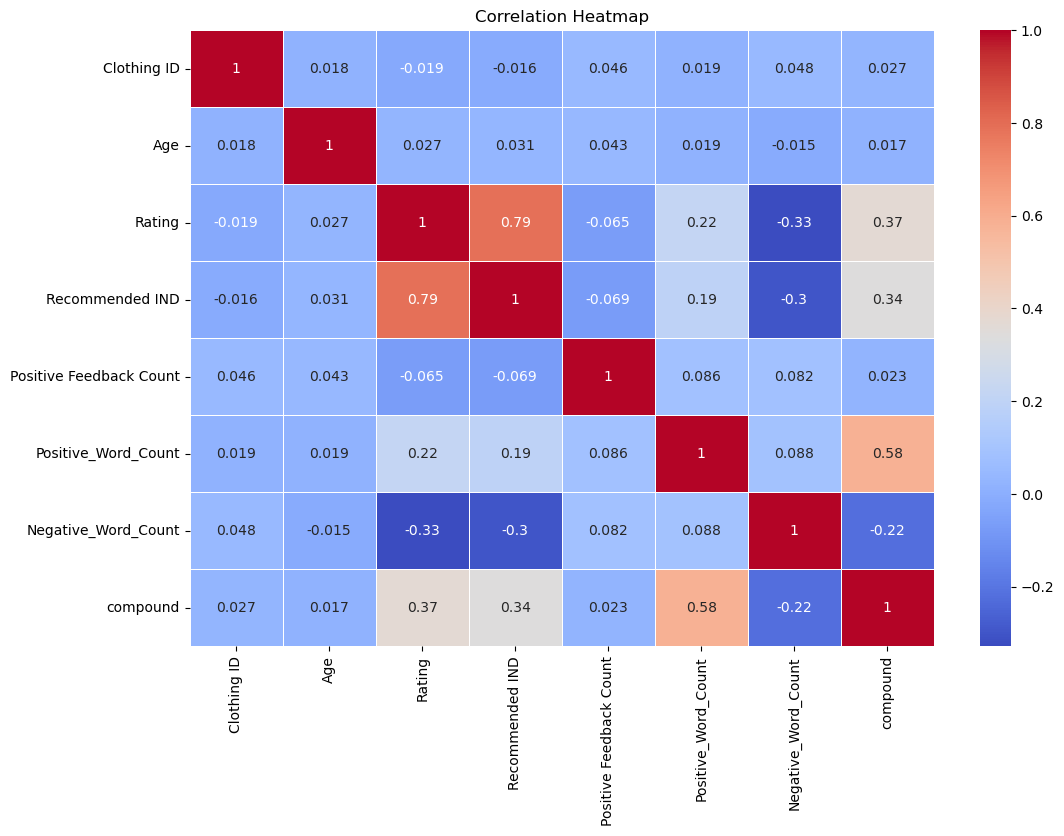

In [80]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for scaling
numerical_features = ['Age', 'Positive Feedback Count', 'Positive_Word_Count', 'Negative_Word_Count','compound','Rating',]

# Specify the columns to keep
columns_to_keep = ['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
                   'Recommended IND', 'Positive Feedback Count', 'Titled_Review',
                   'Tokenized_Review', 'No_Stopwords_Review', 'Lemmatized_Review',
                   'Positive_Word_Count', 'Negative_Word_Count','compound','sentiment']

# Drop columns that are not in the specified list
df = df[columns_to_keep]


# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with "Positive Feedback Count"
positive_feedback_correlation = correlation_matrix['Positive Feedback Count'].sort_values(ascending=False)
print(positive_feedback_correlation)

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation Matrix:
                              Age  Recommended IND  Positive Feedback Count  \
Age                      1.000000         0.030622                 0.043079   
Recommended IND          0.030622         1.000000                -0.069045   
Positive Feedback Count  0.043079        -0.069045                 1.000000   
Positive_Word_Count      0.018629         0.191996                 0.085710   
Negative_Word_Count     -0.015069        -0.298913                 0.082386   
sentiment_encoded        0.018229         0.220477                 0.020365   

                         Positive_Word_Count  Negative_Word_Count  \
Age                                 0.018629            -0.015069   
Recommended IND                     0.191996            -0.298913   
Positive Feedback Count             0.085710             0.082386   
Positive_Word_Count                 1.000000             0.087620   
Negative_Word_Count                 0.087620             1.000000   
sentiment_en

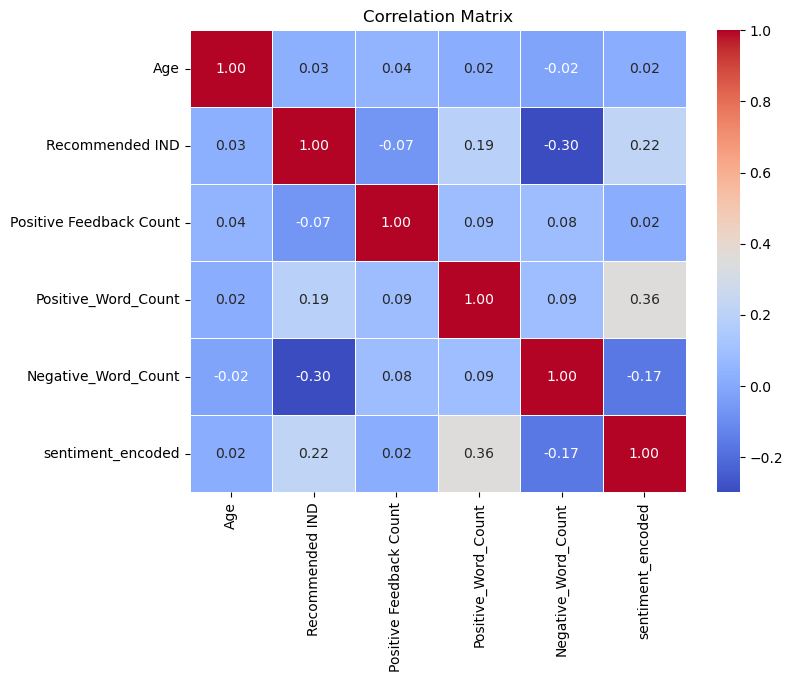

In [81]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'sentiment' is a categorical column
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Now you can calculate the correlation matrix
correlation_matrix = df[['Age','Recommended IND','Positive Feedback Count', 'Positive_Word_Count', 'Negative_Word_Count', 'sentiment_encoded']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Convert 'Rating' column to categorical
df['Rating'] = df['Rating'].astype('category')

# Verify the data type change
print(df['Rating'].dtype)

# Assuming X contains your features and y contains the target variable
X = df[['Positive_Word_Count','Recommended IND','compound']]
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Perform 5-fold cross-validation for each model and calculate weighted F1 score
for model_name, model in models.items():
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    avg_f1_score = f1_scores.mean()
    print(f"{model_name}: Average Weighted F1 Score on Training Set = {avg_f1_score}")

# Train each model on the full training set and evaluate on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1_test = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name}: Weighted F1 Score on Test Set = {f1_test}")

category
Random Forest: Average Weighted F1 Score on Training Set = 0.5513249875638214
Support Vector Machine: Average Weighted F1 Score on Training Set = 0.5186104884072084
K-Nearest Neighbors: Average Weighted F1 Score on Training Set = 0.5658107396296311
Random Forest: Weighted F1 Score on Test Set = 0.5549894542894773
Support Vector Machine: Weighted F1 Score on Test Set = 0.5198215759728886
K-Nearest Neighbors: Weighted F1 Score on Test Set = 0.5493403323403808


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score

# Assuming df_filtered is your filtered DataFrame with the relevant columns
# Extract features and target variable
X = df_filtered[['Positive_Word_Count', 'Recommended IND']]
y = df_filtered['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
#knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
#    ('knn', knn_model),
    ('xgboost', xgb_model),
    ('lightgbm', lgbm_model)
], voting='soft')  # 'hard' for majority voting

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_f1_weighted = f1_score(y_test, ensemble_predictions, average='micro')

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble F1 (Weighted):", ensemble_f1_weighted)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 9848, number of used features: 2
[LightGBM] [Info] Start training from score -3.159542
[LightGBM] [Info] Start training from score -2.555148
[LightGBM] [Info] Start training from score -2.016478
[LightGBM] [Info] Start training from score -1.565048
[LightGBM] [Info] Start training from score -0.620505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [64]:
df['Rating']

0        4
1        5
2        3
3        5
4        5
        ..
23481    5
23482    3
23483    3
23484    3
23485    5
Name: Rating, Length: 23486, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Drop rows where Positive Feedback Count is 0
df_filtered = df[df['Positive Feedback Count'] > 0]

# Convert 'Rating' column to categorical
df_filtered['Rating'] = df_filtered['Rating'].astype('category')

# Verify the data type change
print(df_filtered['Rating'].dtype)

# Assuming X contains your features and y contains the target variable
X = df_filtered[['Positive_Word_Count', 'Positive Feedback Count','Recommended IND','compound']]
y = df_filtered['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Perform 5-fold cross-validation for each model and calculate weighted F1 score
for model_name, model in models.items():
    f1_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    avg_f1_score = f1_scores.mean()
    print(f"{model_name}: Average Weighted F1 Score on Training Set = {avg_f1_score}")

# Train each model on the full training set and evaluate on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1_test = f1_score(y_test, y_pred, average='weighted')
    print(f"{model_name}: Weighted F1 Score on Test Set = {f1_test}")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7876\3772322005.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rating'] = df_filtered['Rating'].astype('category')


category
Random Forest: Average Weighted F1 Score on Training Set = 0.5323822689358242


KeyboardInterrupt: 

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Assuming df_filtered is your filtered DataFrame with the relevant columns
# Extract features and target variable
X = df_filtered[['Positive_Word_Count', 'Positive Feedback Count', 'sentiment_encoded', 'Recommended IND','compound']]
y = df_filtered['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize base models
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('knn', knn_model),
    ('xgboost', xgb_model)
], voting='soft')  # 'hard' for majority voting

# Train the ensemble model
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_f1_weighted = f1_score(y_test, ensemble_predictions, average='micro')

print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble F1 (Weighted):", ensemble_f1_weighted)

Ensemble Accuracy: 0.6149471974004874
Ensemble F1 (Weighted): 0.6149471974004874
